# ReachOut - reaching movement kinematics analysis - Part3 (Visualization)
___

## This Notebook contains all scripts to cluster and vizualize the extracted trajectories:


### 5. Open the scalars.h5 file and plot all the trajectories of the chosen category

### 6. Open the scalars.h5 file and make violin plots for the chosen parameters and reach categories  

### 7. Open the scalars.h5 file and automatically cluster the reaches using one of the built in methods

### 8. Show the number of reaches in each category
  
  ***
  ___










In [2]:
%matplotlib notebook  


# Visualization part
---

In [1]:
#switching for interactive program interface

%matplotlib notebook  

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

SyntaxError: invalid syntax (3785518951.py, line 6)

#### 5. Open the scalars.h5 file and plot all the trajectories of the chosen category
This snippet shows all reaches in the chosen category as Timeseries for visual inspection and analysis. From the lists you can choose the category of reaches and the type of data to plot.

<IPython.core.display.Javascript object>


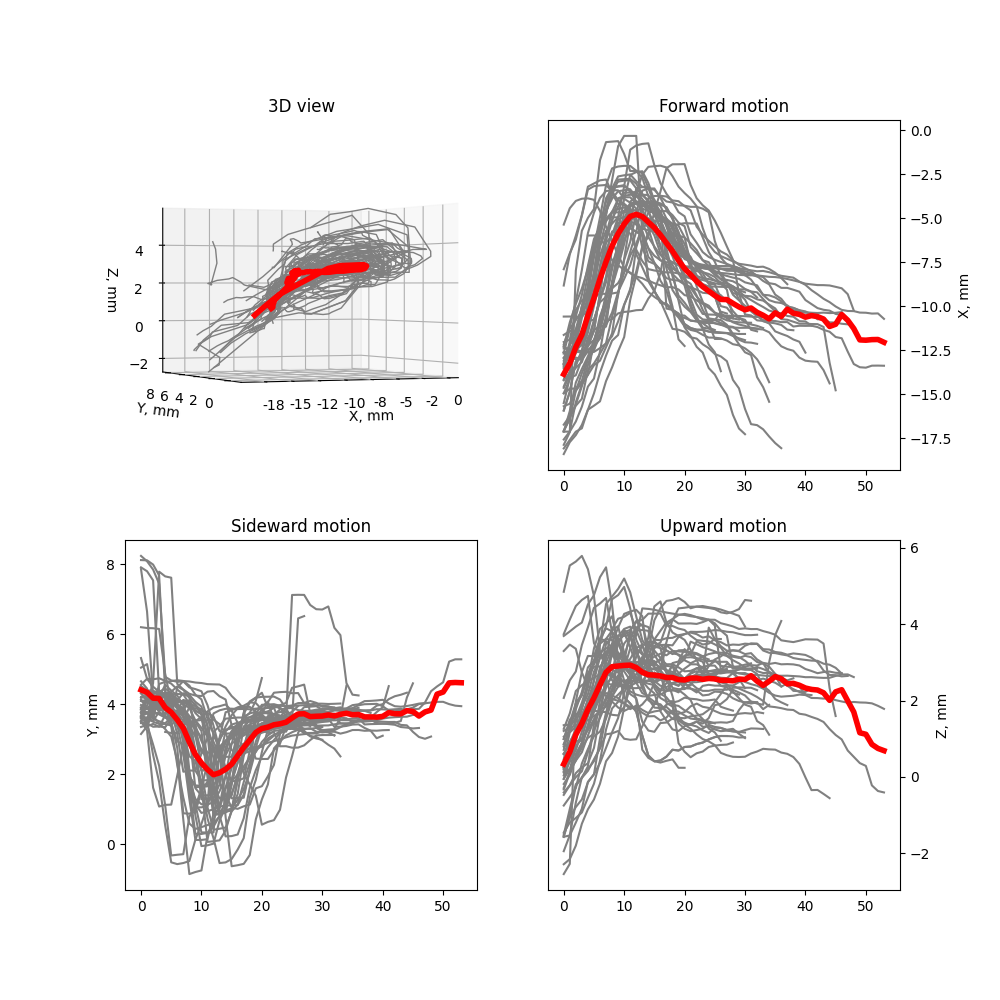

In [3]:
import reach_view
viewer = reach_view.TimeSeriesViewer()

#### 6. Open the scalars.h5 file and make violin plots for the chosen parameters and reach categories
This snippet shows all the calculated parameters for all reaches in the current session in the form of violin plots. 
The categories to show can be chosen from the left list **(Shift/Ctrl+Click for multiple choise)** and parameters - from the right list.
**Left plot** represents mean for the chosen parameter for every reach (data points).
**Right plot** represents variance for the chosen parameter for every reach (data points).

The parameters are contained in the dataframe you load and calculated for each reach - mean and std:

* time_difference 
* dX
* dY
* dZ
* dE
* maxX
* minX
* min_abs_X
* maxY
* minY
* min_abs_Y
* maxZ
* minZ
* min_abs_Z
* mean_velocity
* mean_acceleration
* mean_jerk
* max_velocity
* max_acceleration
* max_jerk
* max_velocity_position
* maxX_position
* minY_position
* maxZ_position

In [ ]:
import scalar_view
viewer = scalar_view.InteractiveScalarViewer()

#### 7. Open the scalars.h5 file and automatically cluster the reaches using one of the built in methods
This snippet allows you to apply one of the popular clustering algorithms to your data. Algorithms are 
taken from the sklearn library and you can learn into more details here: https://scikit-learn.org/stable/modules/clustering.html. We print extracts from this tutorial for each parameter.
As for the parameters in the function, we suggest leaving the default values in the beginning and change them
after reading about the corresponding clustering. In short:

* eps - parameter used only by DBSCAN algorithm, depends on density of the data (can be set lower for more dense data).
"The maximum distance between two samples for one to be considered as in the neighborhood of the other"
* clusters - used only by K-Means clustering, the only supervised algorithm here, explicitly setting the number of clusters to find.
"n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares"
* samples - used only by MeanShift algorithm, needed to estimate the bandwidth to use with the mean-shift algorithm.
"Mean shift clustering aims to discover “blobs” in a smooth density of samples with a kernel of certain bandwidth"
* distance - used only by Agglomerative clustering. Effectively determines where to truncate the classification tree to get the clusters.
"The linkage distance threshold at or above which clusters will not be merged."

In [ ]:
import clustering
columns = ['maxX_mm','minY_mm','maxZ_mm']   #columns to use for clustering. We cluster the reaches based on endpoint.
cluster_analysis = clustering.Cluster_Analysis(columns=columns, eps = 1.0, clusters = 4, samples = 500, distance = 5)

#### 8. Open the scalars.h5 file and show the number of reaches in each category

In [ ]:
from tkinter import *
from tkinter.filedialog import askopenfilename
import pandas as pd

# open file 
root = Tk()
root.update()
file = askopenfilename(filetypes =[('DataTable Files', '*_scalars.h5')])
root.destroy()

# open all the data in the file of interest
mean_df=pd.read_hdf(file, key='mean')    
std_df=pd.read_hdf(file, key='std')
table=pd.read_hdf(file, key='cleared_data')
reach_list_df=pd.read_hdf(file, key='reaches')

#print the number of reaches in each category
print(file)
mean_df['group'].value_counts()

### The end of the third notebook.
Feel free to send feedback and suggestions to https://github.com/BerezhnoyD/Reaching_Task_VAI